<a href="https://colab.research.google.com/github/Meghanah97/Individual-project-hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [5]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly 
import plotly.express as px

In [6]:
#read csv file
Hotel_df=pd.read_csv('/content/Hotel Bookings.csv')

In [7]:
Hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
Hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


we can see that some columns like Agent, Company, country and children have null values.

In [9]:
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
#checking column values of Hotel booking dataframe
Hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
num_of_rows = Hotel_df.shape[0]
print(f"Total no. of rows: {num_of_rows}")

Total no. of rows: 119390


With above exploration Hotel booking dataframe has 119390 rows and 32 columns.

In [12]:
# unique values in each column of the dataframe
print(Hotel_df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

# HotelBooking dataframe columns are:
* hotel: It has values Resort or City Hotel
* is_cancelled: It consist two values 1 indicates canceled and 0 indicates not cancelled
* lead_time: Number of days elapsed between the entering date of the booking and the arrival date
* arrival_date_year: It has year of arrival date
* arrival_date_month: It has month of arrival date
* arrival_date_week_number: It has week number of year for arrival date
* arrival_date_day_of_month: It has day of arrival date
* stays_in_weekend_nights: It has number of weekend nights.
* stays_in_week_nights: It has number of weekend nights.
* adults: It has value for number of adults.
* children: It has value for number children.
* babies: It has value number of babies.
* meal: It has value for type of meal booked.
* country: It has country origin.
* market_segment: 
* distribution_channel
* is_repeated_guest
* previous_cancellations
* previous_bookings_not_cancelled
* reserved_room_type
* assigned_room_type
* booking_changes
* deposit_type
* agent
* company
* days_in_waiting_list
* customer_type
* adr
* required_car_parking_spaces
* total_of_special_requests
* reservation_status
* reservation_status_date

## **Clean**

In [13]:
Hotel_df.drop_duplicates(inplace = True)
num_of_rows = Hotel_df.shape[0]
num_of_rows

87396

In [14]:
miss_values = Hotel_df.isnull().sum().sort_values(ascending=False)[:4]
miss_values

company     82137
agent       12193
country       452
children        4
dtype: int64

In [15]:
percentage_of_missing_values = miss_values.get(key='company')/num_of_rows*100
percentage_of_missing_values

93.98256213098998

In [16]:
Hotel_df.drop(['company'], axis=1, inplace=True)
Hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [17]:
percentage_of_missing_values = miss_values.get(key='agent')/num_of_rows*100
percentage_of_missing_values

13.951439425145315

In [18]:
Hotel_df['agent'].fillna(value = Hotel_df.agent.mode()[0], inplace=True)
Hotel_df.agent.isnull().sum()

0

In [19]:

percentage_of_missing_values = miss_values.get(key='children')/num_of_rows*100
percentage_of_missing_values

0.004576868506567806

In [20]:
Hotel_df['children'].fillna(value = 0, inplace=True)

In [21]:
Hotel_df.children.isnull().sum()

0

In [22]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [23]:
Hotel_df[['children', 'agent']] = Hotel_df[['children', 'agent']].astype('int64')

In [24]:
Hotel_df['reservation_status_date'] = pd.to_datetime(Hotel_df['reservation_status_date'], format='%Y-%m-%d')

In [25]:
Hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
#Adding total stays in nights

Hotel_df['total_stays_in_nights'] = Hotel_df['stays_in_weekend_nights'] + Hotel_df['stays_in_week_nights']

In [27]:
# Adding revenue

Hotel_df['revenue'] = Hotel_df['total_stays_in_nights'] * Hotel_df['adr']

In [28]:
 #Adding total number of guests as column

Hotel_df['total_guests'] = Hotel_df['adults'] + Hotel_df['children'] + Hotel_df['babies']

In [29]:
# Adding column which shows whether reserved room type is the same as assigned room type

Hotel_df['is_reserved_room_type_assigned'] = Hotel_df.apply(lambda x: 'same room type assigned' if x['reserved_room_type'] == x['assigned_room_type'] 
                                                                                                   else 'different room type assigned', axis=1)

In [30]:
# changing the bool data from int to string for easy representation

Hotel_df['is_canceled'] = Hotel_df['is_canceled'].replace([1, 0], ['cancelled', 'not cancelled'])
Hotel_df['is_repeated_guest'] = Hotel_df['is_repeated_guest'].replace([1, 0], ['repeated guest', 'not repeated guest'])
Hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays_in_nights,revenue,total_guests,is_reserved_room_type_assigned
0,Resort Hotel,not cancelled,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,2,same room type assigned
1,Resort Hotel,not cancelled,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,2,same room type assigned
2,Resort Hotel,not cancelled,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,1,different room type assigned
3,Resort Hotel,not cancelled,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,1,same room type assigned
4,Resort Hotel,not cancelled,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,196.0,2,same room type assigned


In [31]:
# define a function to plot a pie chart from grouped count values
# so that it can be used in the later stages also

# get count of each unique from from a particular column 
# and output its as a dataframe
def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd


In [32]:
# plot a pie chart from grouped data
def plot_pie_chart_from_column(df, column_label):
  df_grpd = get_count_from_column(df, column_label)

  fig, ax = plt.subplots(figsize=(14, 6))
  ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%', startangle=90)
  ax.axis('equal')
  plt.show()

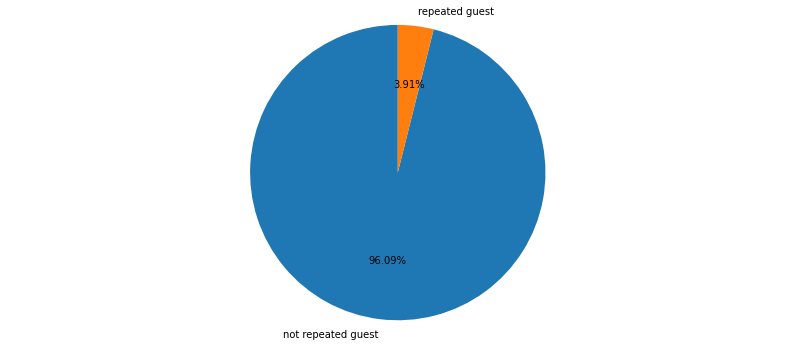

In [33]:
# plot a pie chart to show % of repeated guests
plot_pie_chart_from_column(Hotel_df, 'is_repeated_guest')

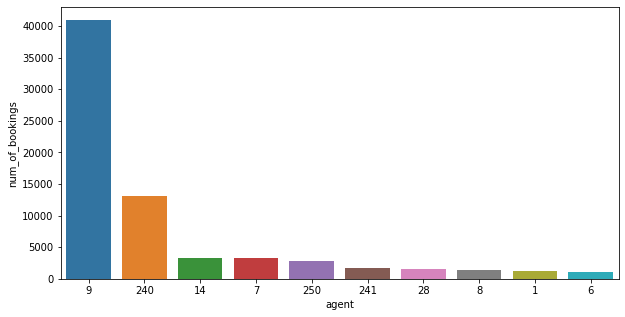

In [34]:
temp = pd.DataFrame(Hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
temp.drop(temp[temp['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
temp = temp[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = temp, order = temp.sort_values('num_of_bookings', ascending = False).agent)

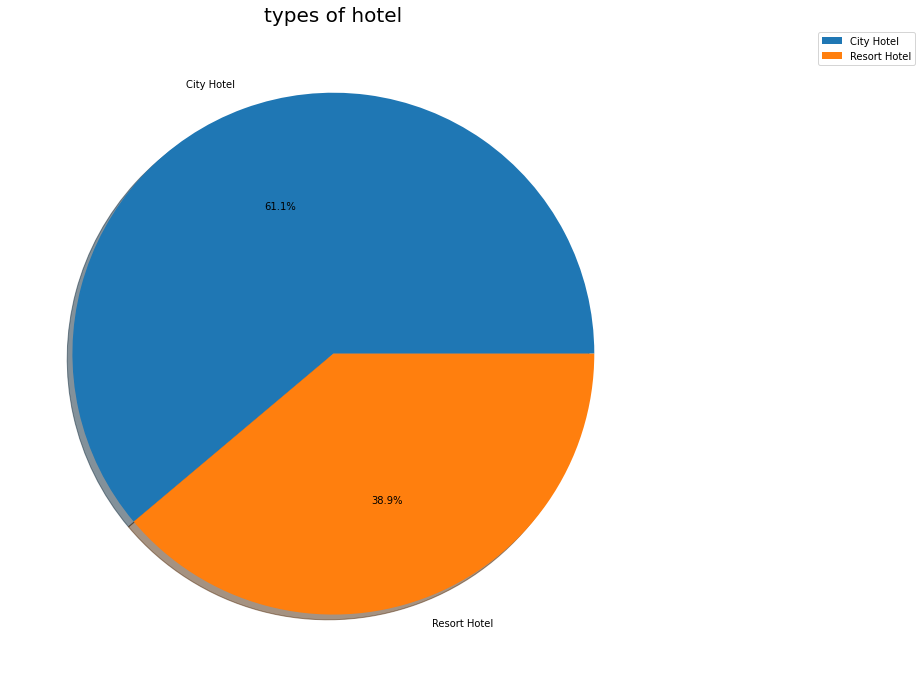

In [35]:
temp = Hotel_df['hotel'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['hotel'], labels= temp['index'],autopct= '%1.1f%%',shadow=True)
plt.legend()
plt.title('types of hotel',size = 20);
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

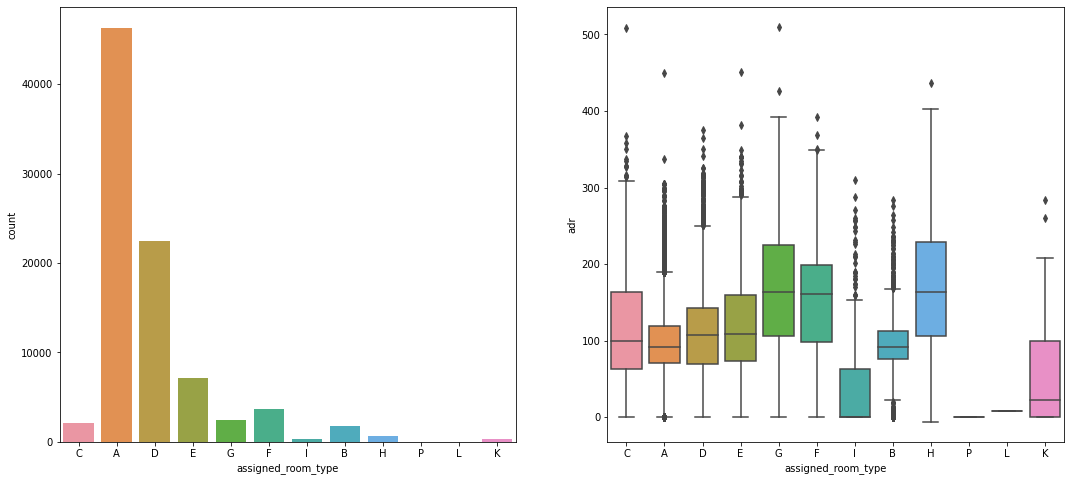

In [36]:
Hotel_df.drop(Hotel_df[Hotel_df['adr'] > 5000].index, inplace = True)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = Hotel_df.groupby('assigned_room_type')
temp['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = Hotel_df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = Hotel_df['assigned_room_type'], y = Hotel_df['adr'])
plt.show()

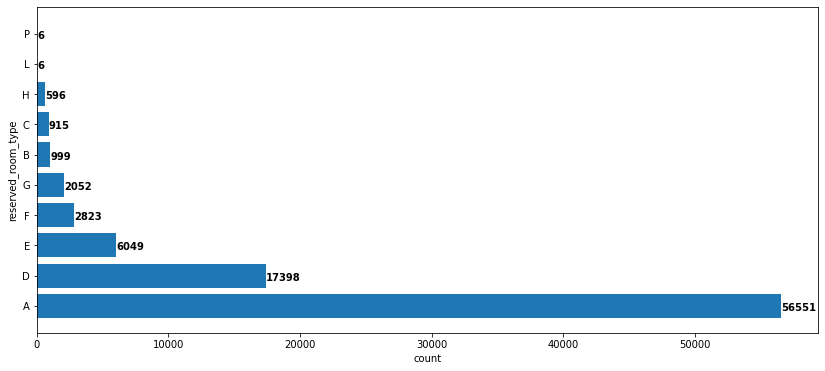

In [37]:
# define a function to plot a horizontal bar graph from grouped count values
# so that it can be used in the later stages also

def plot_horz_bar_graph_from_grpd_column(df_grpd, column_label):
  fig, ax = plt.subplots(figsize=(14, 6))
  bars = ax.barh(df_grpd['index'], df_grpd['count'])
  plt.ylabel(column_label)
  plt.xlabel('count')

  for i, v in enumerate(df_grpd['count']):
    ax.text(v + 3, i - 0.15, str(v), fontweight='bold')

def plot_horz_bar_graph_from_column(df, column_label):
  df_grpd = get_count_from_column(df, column_label)
  plot_horz_bar_graph_from_grpd_column(df_grpd, column_label)

# plot a horizontal bar graph to compare the number of bookings made for each room type
plot_horz_bar_graph_from_column(Hotel_df, 'reserved_room_type')

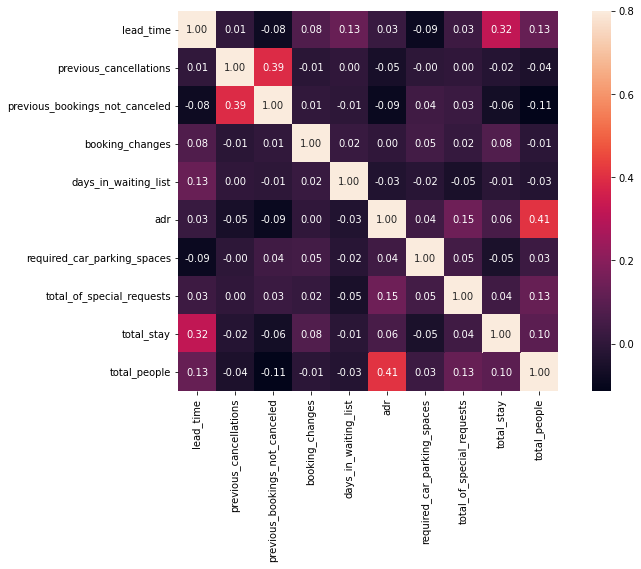

In [38]:
# Adding total staying days in hotels
Hotel_df['total_stay'] = Hotel_df['stays_in_weekend_nights']+Hotel_df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
Hotel_df['total_people'] = Hotel_df['adults']+Hotel_df['children']+Hotel_df['babies']
Hotel_df1 = Hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]
#correlation matrix
corrmat = Hotel_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

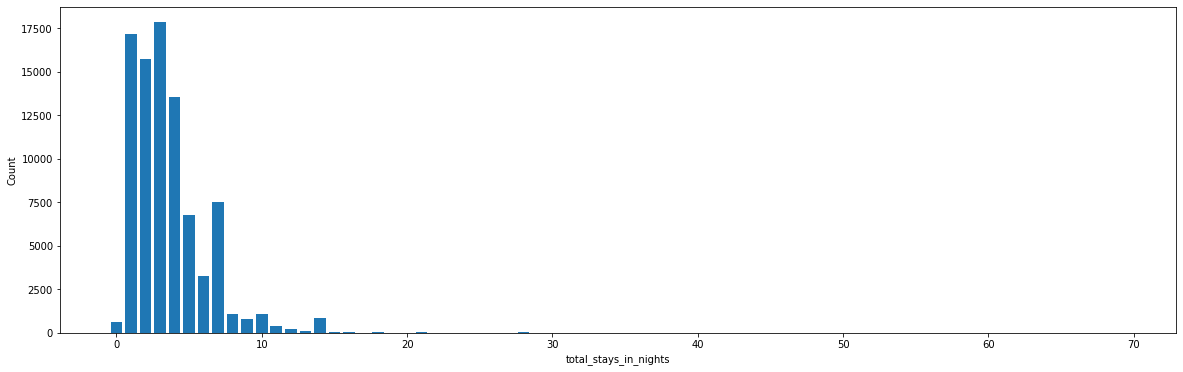

In [39]:
# define a function to plot a bar graph from grouped count values
# so that it can be used in the later stages also

# add value to the top of each bar
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center", fontweight='bold')

# plot bar graph from grouped data
def plot_bar_graph_from_column(df, column_label):
  df_grpd = get_count_from_column(df, column_label)

  fig, ax = plt.subplots(figsize=(20, 6))
  plt.bar(df_grpd['index'].tolist(), df_grpd['count'].tolist())
  add_value_label(df_grpd['index'].tolist(), df_grpd['count'].tolist())
  plt.xlabel(column_label)
  plt.ylabel("Count")
  plt.xticks(rotation='horizontal')
  plt.show()

# plot bar graph from grouped data without values
def plot_bar_graph_from_column_wo_values(df, column_label):
  df_grpd = get_count_from_column(df, column_label)

  fig, ax = plt.subplots(figsize=(20, 6))
  plt.bar(df_grpd['index'].tolist(), df_grpd['count'].tolist())
  plt.xlabel(column_label)
  plt.ylabel("Count")
  plt.xticks(rotation='horizontal')
  plt.show()
plot_bar_graph_from_column_wo_values(Hotel_df, 'total_stays_in_nights')

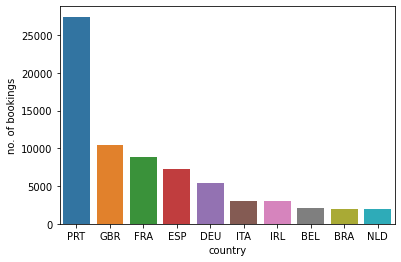

In [40]:
grp_by_country = Hotel_df.groupby('country')
temporar = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
temporar = temporar[:10]
sns.barplot(x = temporar.index, y = temporar['no. of bookings'])

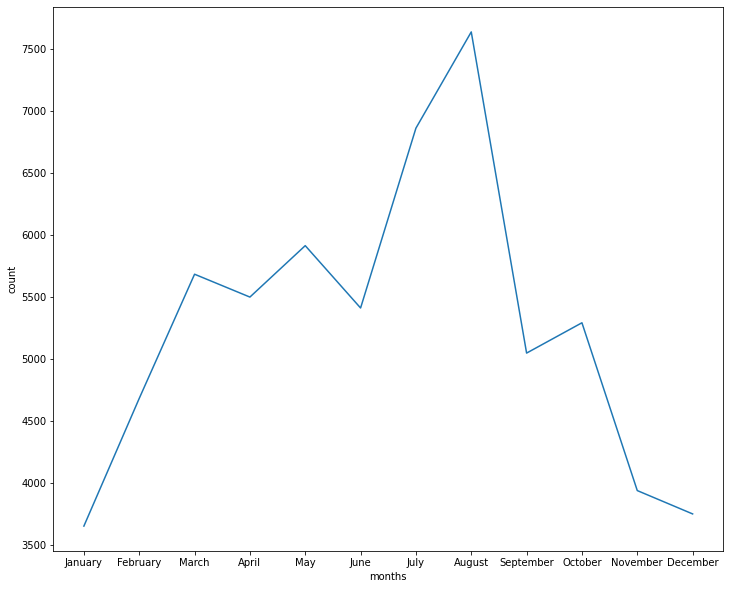

In [41]:

order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
ordered_hotel_df = Hotel_df[Hotel_df['is_canceled'] == 'not cancelled']['arrival_date_month'].value_counts().reindex(order)

plt.figure(figsize=(12, 10))
plt.plot(ordered_hotel_df.index, ordered_hotel_df.values)
plt.xlabel('months')
plt.ylabel('count')
plt.xticks(rotation='horizontal')
plt.show()

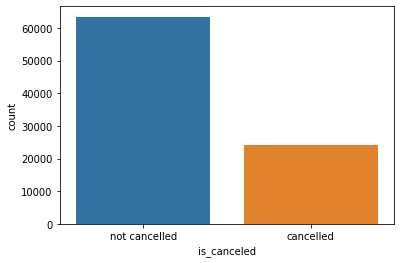

In [42]:
Hotel_df['is_canceled'] = Hotel_df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = Hotel_df['is_canceled']
sns.countplot(canceled_data)

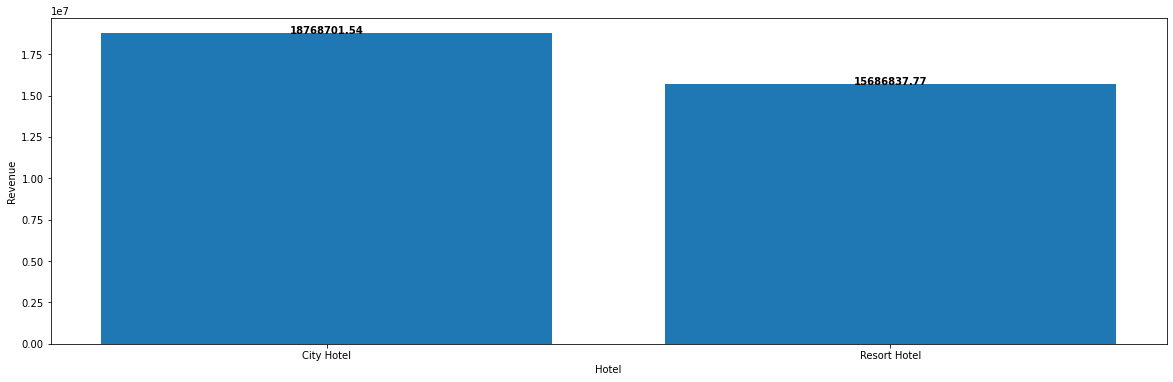

In [43]:
# plot a bar graph to show the revenue generated by each hotel
temp_df = Hotel_df.groupby('hotel')['revenue'].sum().reset_index(name='total_revenue')
# temp_df.head()
fig, ax = plt.subplots(figsize=(20, 6))
plt.bar(temp_df['hotel'].tolist(), temp_df['total_revenue'].tolist())
add_value_label(temp_df['hotel'].tolist(), temp_df['total_revenue'].tolist())
plt.xlabel('Hotel')
plt.ylabel('Revenue')
plt.xticks(rotation='horizontal')
plt.show()

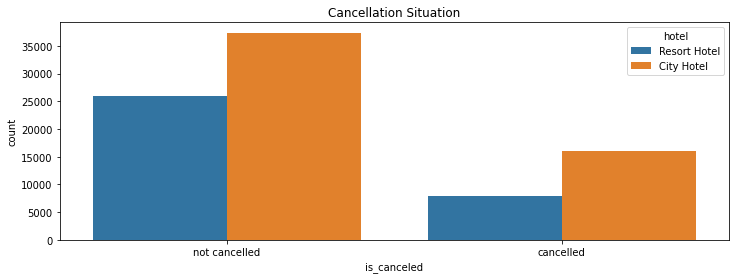

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(x='is_canceled', hue = 'hotel', data= Hotel_df)
plt.title('Cancellation Situation')
plt.show()

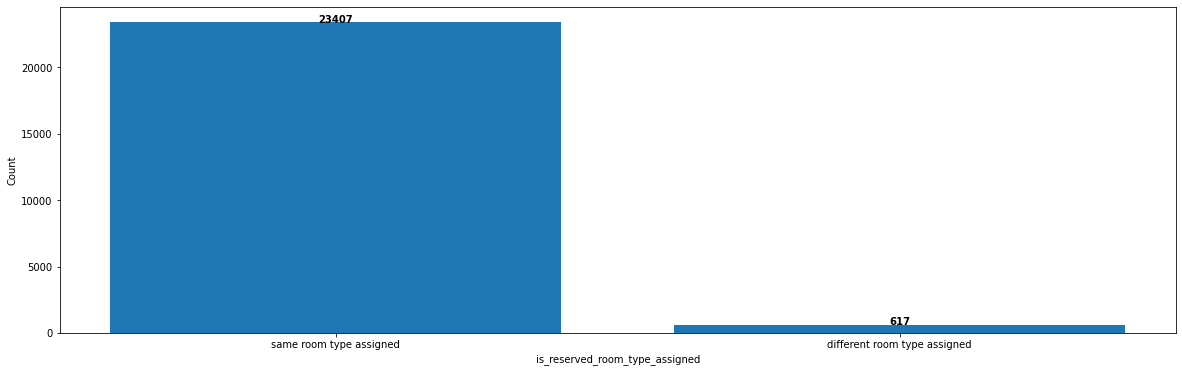

In [45]:
# plot a bar graph to show the number of bookings cancelled when reserved room type is the same and different as the assigned room type
plot_bar_graph_from_column(Hotel_df[Hotel_df['is_canceled'] == 'cancelled'], 'is_reserved_room_type_assigned')

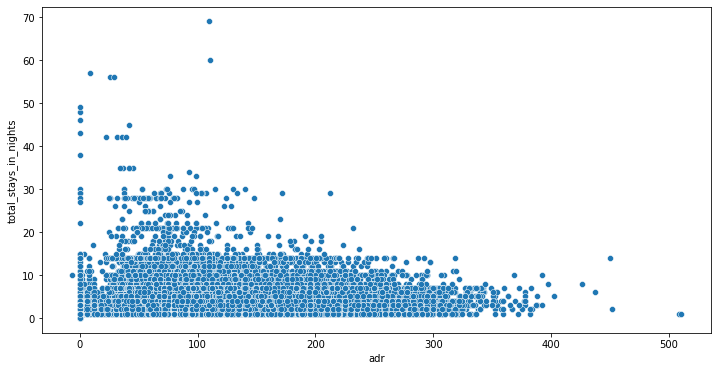

In [46]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_stays_in_nights', x = 'adr', data = Hotel_df)
plt.show()

In [47]:
top10 = Hotel_df[Hotel_df['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL",
                         "BEL","BRA","NLD"])]

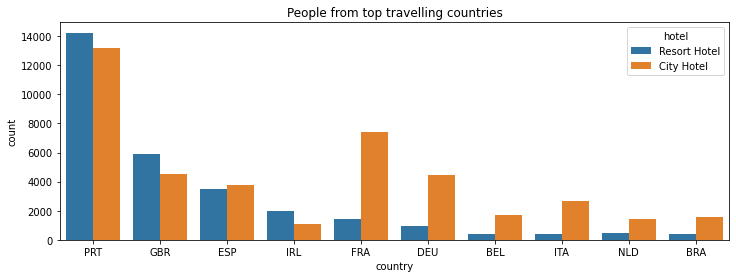

In [48]:
plt.figure(figsize=(12,4))
sns.countplot(x='country', hue = 'hotel', data= top10)
plt.title('People from top travelling countries')
plt.show()

In [49]:
temp = Hotel_df['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,
                          locations=temp['country'],
                          color=np.log(temp['count']), 
                          hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Plasma,
                          title="Home country of guests")
guest_map.show()

In [51]:
def sort_categories_distrib(df, var):
    
    '''Assigns relative frequency and cumulative relative frequency for each category of an object column in a data frame
    and sorts it from higher to lower frequency
    
    INPUTS
    
        - df: DataFrame with the column to sort
        - var: column to sort
    
    OUTPUT
    
    DataFrame with sorted relative frequencies
    '''
    
    # series of sorted values with frequencies
    sorted_categories = df[var].value_counts().sort_values(ascending = False)
    
    # computes relative frequency
    sorted_categories = pd.DataFrame(data = sorted_categories / sum(sorted_categories)).rename(columns = {var:"f"})
   
    # computes cumulative relative frequency
    sorted_categories['F'] = sorted_categories.f.cumsum()
    
    return sorted_categories

In [52]:
def group_main_categories(df, var, n_categories):
    
    ''' Groups less frequent categories in an object column from a DataFrame assigning them the value "other"
    making use of the sort_categories_distrib function. 
        
    
    IMPUTS
        - df: DataFrame with column to group
        - var: column to group
        - n_categories: Threshold. Number of most frequent categories that won't be grouped.
    '''
    
    # gets most frequent categories
    main_categories = sort_categories_distrib(df, var).head(n_categories).index
    
    # groups categories if they are not among the most frequent ones
    return [categorie if categorie in main_categories else "other" for categorie in df[var]]
    

In [54]:
Hotel_df['country_grouped'] = group_main_categories(Hotel_df, "country", 7)

TypeError: ignored

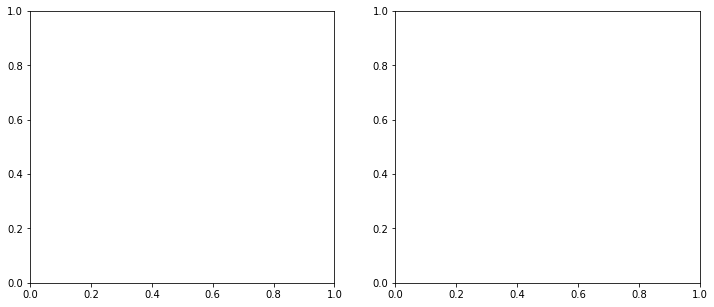

In [57]:

# bar plot for country of origin

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.barplot(x = "is_canceled", y = "country_grouped", data = Hotel_df[Hotel_df.hotel == "City Hotel"], color = "#1f77b4",order = ["PRT", "ITA", "IRL", "other", "GBR", "ESP", "FRA", "DEU"],ci = None,alpha = 0.7,ax = ax[0])

# draw bar plot for resort hotel
sns.barplot(x = "is_canceled", y = "country_grouped", data = Hotel_df[Hotel_df.hotel == "Resort Hotel"], color = "#ff7f0e",order = ["PRT", "ESP", "IRL",  "ITA", "other", "GBR", "FRA", "DEU"],ci = None,alpha = 0.7,ax = ax[1])


# formatting
sns.despine(left = True)

fig.suptitle("Cancelations by country of origin")

ax[0].set(xlabel = "Proportion of bookings canceled", ylabel = None)
ax[1].set(xlabel = "Proportion of bookings canceled", ylabel = None)
          
sns.set_palette(["#39A7D0", "#36ADA4"])

# save figure
fig.savefig("figures/cancelations_country.png")